## 1. Business Statement

### Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

### Load Dataset

In [3]:
data=pd.read_csv("application_record.csv")

In [4]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
record = pd.read_csv("credit_record.csv")

In [6]:
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


## 2. Data Understanding

In [7]:
#previewing the dimensions or shape (rows and columns)of the data

data.shape

(438557, 18)

In [8]:
record.shape

(1048575, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
data.duplicated().sum()

0

In [12]:
record.duplicated().sum()

0

In [13]:
data.set_index("ID",inplace=True)

In [14]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [15]:
record.set_index("ID",inplace=True)

In [16]:
record.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


In [17]:
begin_month = pd.DataFrame(record.groupby(["ID"])['MONTHS_BALANCE'].agg(min))
begin_month = begin_month.rename(columns={'MONTHS_BALANCE':'Account age'})
full_data = pd.merge(data, begin_month,how='left',on='ID')

In [18]:
record["dep_value"] = None
record["dep_value"][record["STATUS"]=='2']='Yes'
record["dep_value"][record["STATUS"]=='3']='Yes'
record["dep_value"][record["STATUS"]=='4']='Yes'
record["dep_value"][record["STATUS"]=='5']='Yes'

In [19]:
cpunt= record.groupby('ID').count()

In [20]:
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes'
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'
cpunt = cpunt[['dep_value']]

In [21]:
df = pd.merge(full_data,cpunt,how='inner',on='ID')

In [22]:
df['high_risk'] =df['dep_value']

In [23]:
df.loc[df['high_risk']=='Yes','high_risk']=1
df.loc[df['high_risk']=='No','high_risk']=0


In [24]:
df.drop('dep_value',axis=1,inplace=True)

In [25]:
df.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
Account age                0
high_risk                  0
dtype: int64

In [26]:
# rename the features to a more readable feature names
df = df.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment status',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family member count',
    'Account age': 'Account age'
    })

In [27]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,high_risk
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [28]:
df_one=df.dropna()

In [29]:
df_two = df.drop('Job title',axis=1)

In [30]:
df_one.isnull().sum()

Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
high_risk              0
dtype: int64

In [31]:
#datafremea
#df: impute Job title
#df_one: drop null
#df_two: drop Job title

## 3. Data Visualization

## 4. Data Preprocessing

In [32]:
df = df.drop(['Has a mobile phone','Children count','Job title','Account age'],axis=1)

In [33]:
df = df.reset_index(drop=True)

In [34]:
le = LabelEncoder()

In [35]:
df['Gender'] = le.fit_transform(df['Gender']) #1 male,0 Female
df['Has a car'] = le.fit_transform(df['Has a car']) # 1 Yes, 0 No
df['Has a property'] = le.fit_transform(df['Has a property'])# 1 yes ,0 No

In [36]:


df['Employment status'] = le.fit_transform(df['Employment status'])
# 0 Commercial Associate 
#1 Pensioner
#2 State Servant 
#3 Student
#4 Working

#=====================================================================


df['Education level'] = le.fit_transform(df['Education level'])

#Secondary / secondary special     4
#Higher education                  1
#Incomplete higher                 2
#Lower secondary                   3
#Academic degree                   0

#=====================================================================

df['Marital status'] = le.fit_transform(df['Marital status'])

#Married                   1
#Single / not married      3
#Civil marriage            0
#Separated                 2
#Widow                     4

#=====================================================================


df['Dwelling'] = le.fit_transform(df['Dwelling'])

#House / apartment        1
#With parents             5
#Municipal apartment      2
#Rented apartment         4
#Office apartment         3
#Co-op apartment          0

In [37]:
Q1 = df['Income'].quantile(.25)
Q3 = df['Income'].quantile(.75)
IQR = Q3 - Q1 

In [38]:
df = df[~((df['Income'] < (Q1 - 3*IQR)) | (df['Income'] > ( Q3 + 3*IQR)))]

In [39]:
Q1 = df['Family member count'].quantile(.25)
Q3 = df['Family member count'].quantile(.75)
IQR = Q3 - Q1

In [40]:
df = df[~((df['Family member count'] < (Q1 - 3*IQR)) | (df['Family member count'] > ( Q3 + 3*IQR)))]

In [41]:
Q1 = df['Employment length'].quantile(.25)
Q3 = df['Employment length'].quantile(.75)
IQR = Q3 - Q1

In [42]:
df = df[~((df['Employment length'] < (Q1 - 3*IQR)) | (df['Employment length'] > ( Q3 + 3*IQR)))]

In [43]:
df[['Employment length','Age']] = np.abs(df[['Employment length','Age']])

In [44]:
df_ret_idx = df['Employment length'][df['Employment length'] == 365243].index
df.loc[df_ret_idx,'Employment length'] = 0

In [45]:
df[['Income','Age']] = np.cbrt(df[['Income','Age']]) 

In [46]:
df.head()

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,high_risk
0,1,1,1,75.331863,4,1,0,4,22.897464,4542,1,0,0,2.0,0
1,1,1,1,75.331863,4,1,0,4,22.897464,4542,1,0,0,2.0,0
2,1,1,1,48.274469,4,4,1,1,27.795275,1134,0,0,0,2.0,0
3,0,0,1,64.633041,0,4,3,1,26.735413,3051,0,1,1,1.0,0
4,0,0,1,64.633041,0,4,3,1,26.735413,3051,0,1,1,1.0,0


In [47]:
scaler = MinMaxScaler()

In [48]:
df[['Income', 'Age', 'Employment length']] = scaler.fit_transform(df[['Income', 'Age', 'Employment length']])

In [49]:
df['high_risk'] = pd.to_numeric(df['high_risk'])

In [50]:
df[['Gender', 'Has a car', 'Has a property','Employment status','Education level', 'Marital status', 'Dwelling','Has a work phone', 'Has a phone', 'Has an email','Family member count']] = df[['Gender', 'Has a car', 'Has a property','Employment status','Education level', 'Marital status', 'Dwelling','Has a work phone', 'Has a phone', 'Has an email','Family member count']].astype(float)

In [51]:
df.head()

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,high_risk
0,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
1,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
2,1.0,1.0,1.0,0.358480,4.0,4.0,1.0,1.0,0.864281,0.098719,0.0,0.0,0.0,2.0,0
3,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0
4,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0


In [52]:
df.columns

Index(['Gender', 'Has a car', 'Has a property', 'Income', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Age',
       'Employment length', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'high_risk'],
      dtype='object')

In [53]:
X = df.drop('high_risk',axis=1)
y = df['high_risk']

In [54]:
y.value_counts()

0    29085
1      494
Name: high_risk, dtype: int64

In [55]:
df.head()

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,high_risk
0,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
1,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
2,1.0,1.0,1.0,0.358480,4.0,4.0,1.0,1.0,0.864281,0.098719,0.0,0.0,0.0,2.0,0
3,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0
4,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0


In [56]:
smote = SMOTE(sampling_strategy='minority')

In [57]:
X_sm,y_sm = smote.fit_resample(X,y)

In [58]:
y_sm.value_counts()

0    29085
1    29085
Name: high_risk, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm, test_size=0.33, random_state=42,stratify=y_sm)

## 5. Modelling

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
predictions = dtree.predict(X_test)

## 6. Evaluation

In [91]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[9398  201]
 [ 186 9412]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9599
           1       0.98      0.98      0.98      9598

    accuracy                           0.98     19197
   macro avg       0.98      0.98      0.98     19197
weighted avg       0.98      0.98      0.98     19197



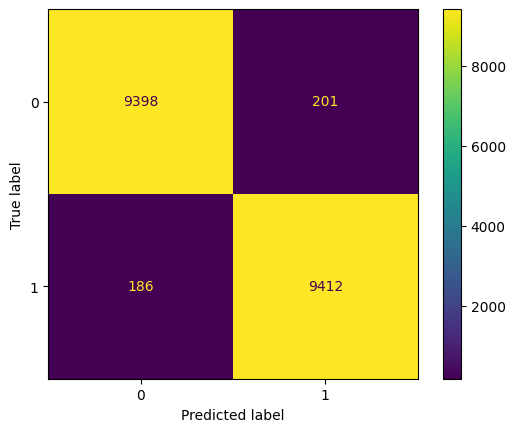

In [100]:
plot_confusion_matrix(dtree, X_test,y_test)

## 7. Deploying

###  Saving the model

In [109]:
filename = 'credit_model.sav'
pickle.dump(dtree,open(filename,'wb'))

### Loading the model

In [110]:
saved_model = pickle.load(open(filename, 'rb'))

In [121]:
sample = X_train.sample()

In [132]:
sample = df.sample()
sample

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,high_risk
20119,0.0,0.0,0.0,0.806979,0.0,4.0,1.0,1.0,0.726787,0.157578,0.0,0.0,0.0,2.0,0


In [129]:
xx = sample.drop('high_risk',axis=1)

In [136]:
xx.shape

(1, 14)

In [173]:
yy = np.array([[0.0, 0.0, 0.0, 0.345682, 0.0, 4.0, 1.0, 1.0, 0.580682, 0.796465, 0.0, 1.0, 0.0, 2.0]])
items = yy.astype(np.float)

In [175]:
items.shape

(1, 14)

In [177]:
saved_model.predict(items)[0]

0

In [179]:
cl =pd.read_csv("cleaned_df")

In [180]:
cl.head()

,Unnamed: 0,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,high_risk
0,0,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
1,1,1.0,1.0,1.0,0.889251,4.0,1.0,0.0,4.0,0.349965,0.399912,1.0,0.0,0.0,2.0,0
2,2,1.0,1.0,1.0,0.358480,4.0,4.0,1.0,1.0,0.864281,0.098719,0.0,0.0,0.0,2.0,0
3,3,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0
4,4,0.0,0.0,1.0,0.679378,0.0,4.0,3.0,1.0,0.752985,0.268140,0.0,1.0,1.0,1.0,0
